#BACKGROUND
Data yang digunakan : https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17/data

tujuan : klasifikasi bintang, galaksi dan quasar berdasarkan spektrumnya menggunakan algoritma Random forest, Decision tree, dan Gaussian Naive Bayes dari data SDSS17 di kaggle

Dataset terdiri dari 100.000 data pengamatan yang diambil dari SDSS (Sloan Digital Sky Survey). Setiap pengamatan terdiri dari 17 feature column dan 1 class yang mengidentifikasi bintang, galaksi, atau quasar.

1. obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2. alpha = Right Ascension angle (at J2000 epoch)
3. delta = Declination angle (at J2000 epoch)
4. u = Ultraviolet filter in the photometric system
5. g = Green filter in the photometric system
6. r = Red filter in the photometric system
7. i = Near Infrared filter in the photometric system
8. z = Infrared filter in the photometric system
9. run_ID = Run Number used to identify the specific scan
10. rereun_ID = Rerun Number to specify how the image was processed
11. cam_col = Camera column to identify the scanline within the run
12. field_ID = Field number to identify each field
13. spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14. class = object class (galaxy, star or quasar object)
15. redshift = redshift value based on the increase in wavelength
16. plate = plate ID, identifies each plate in SDSS
17. MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18. fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

# *IMPORT LIBRARIES*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import seaborn as sns



# *DATA LOADING*

In [ ]:
#load data
from google.colab import drive
drive.mount('/content/drive')
#membaca dataset
df = pd.read_csv('/content/drive/My Drive/archive/star_classification.csv')
#menampilkan 5 data terbawah
df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(100000, 18)

## Mendeteksi missing value

In [ ]:
df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Tidak terdapat missing values.

In [ ]:
#tipe data
dict(df.dtypes)

{'obj_ID': dtype('float64'),
 'alpha': dtype('float64'),
 'delta': dtype('float64'),
 'u': dtype('float64'),
 'g': dtype('float64'),
 'r': dtype('float64'),
 'i': dtype('float64'),
 'z': dtype('float64'),
 'run_ID': dtype('int64'),
 'rerun_ID': dtype('int64'),
 'cam_col': dtype('int64'),
 'field_ID': dtype('int64'),
 'spec_obj_ID': dtype('float64'),
 'class': dtype('O'),
 'redshift': dtype('float64'),
 'plate': dtype('int64'),
 'MJD': dtype('int64'),
 'fiber_ID': dtype('int64')}

Terdapat 17 data numerik dan 1 data objek/kategori

#EDA


## Persentase galaksi, bintang, dan quasar pada observasi.

<Axes: ylabel='class'>

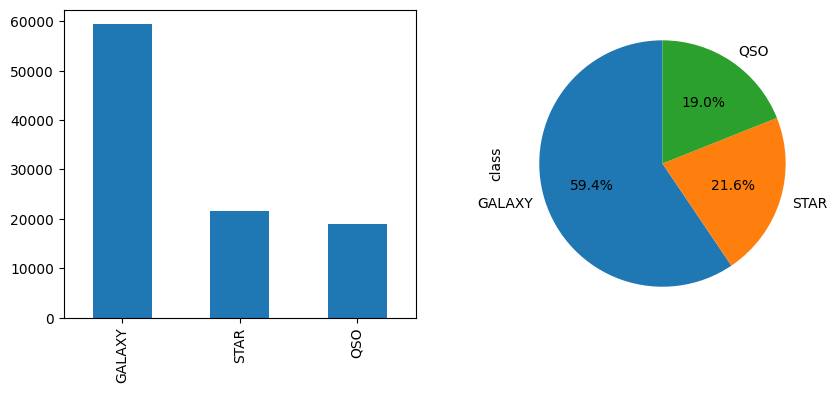

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
df['class'].value_counts().plot(kind='bar', ax=axs[0])
df['class'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

Dari 100.000 observasi, ada 21.600 data bintang, 19.000 data quasar, dan 59.400 data galaksi.

## Analisa statistik

In [ ]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


Terlihat bahwa persebaran data dari yang terkecil adalah redshift.

## Visualisasi setiap kolom numerik

array([[<Axes: title={'center': 'obj_ID'}>,
        <Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'delta'}>, <Axes: title={'center': 'u'}>],
       [<Axes: title={'center': 'g'}>, <Axes: title={'center': 'r'}>,
        <Axes: title={'center': 'i'}>, <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'run_ID'}>,
        <Axes: title={'center': 'rerun_ID'}>,
        <Axes: title={'center': 'cam_col'}>,
        <Axes: title={'center': 'field_ID'}>],
       [<Axes: title={'center': 'spec_obj_ID'}>,
        <Axes: title={'center': 'redshift'}>,
        <Axes: title={'center': 'plate'}>,
        <Axes: title={'center': 'MJD'}>],
       [<Axes: title={'center': 'fiber_ID'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

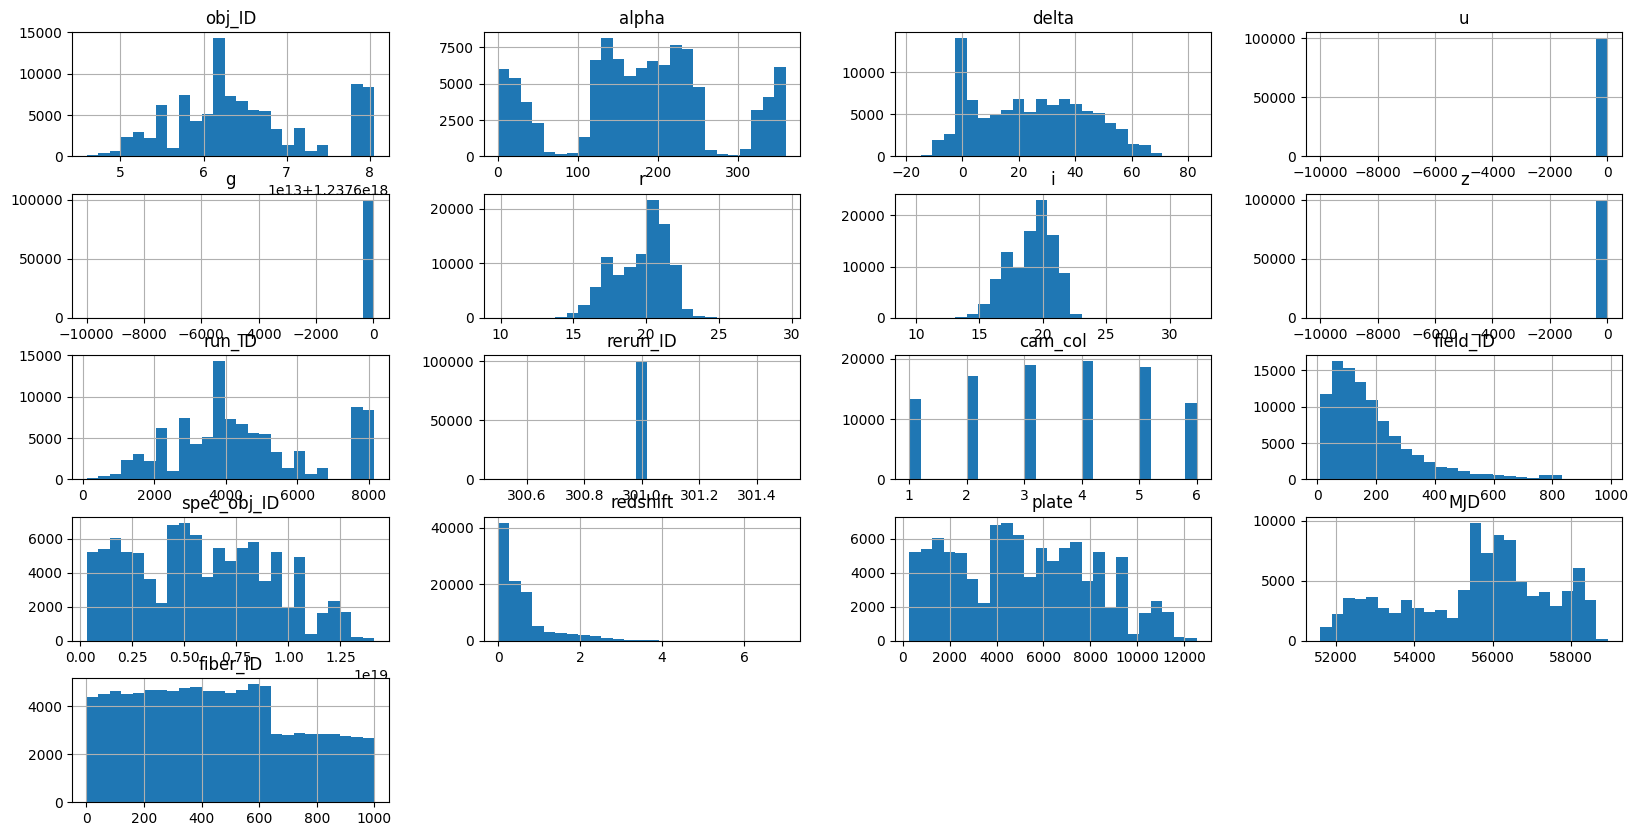

In [ ]:
featuredf = df.drop(['class'], axis=1)
featuredf.hist(bins=25, figsize=(20,10))

## Density distribution

<ipython-input-8-137917bf986d>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.displot(


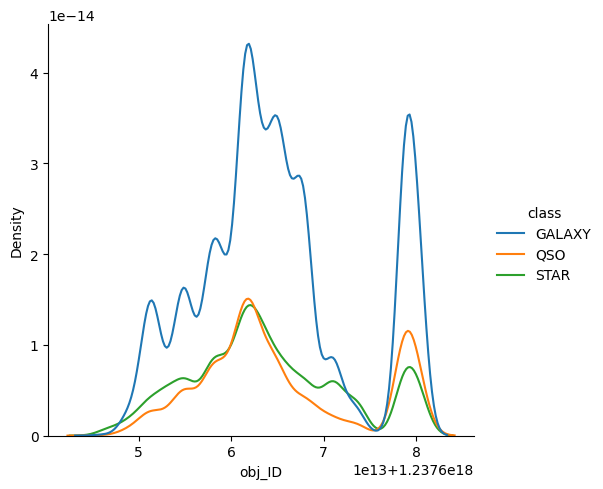

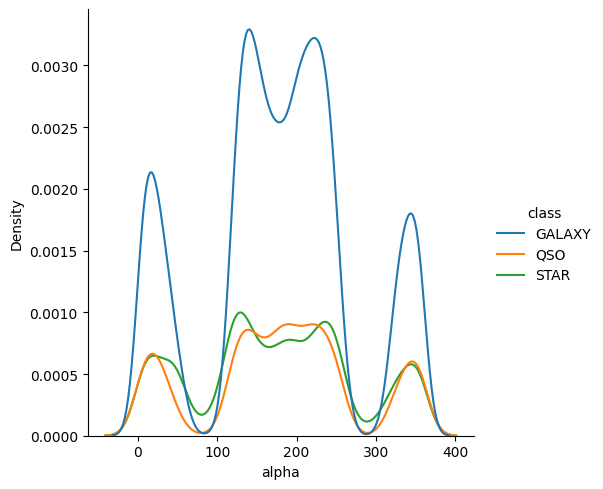

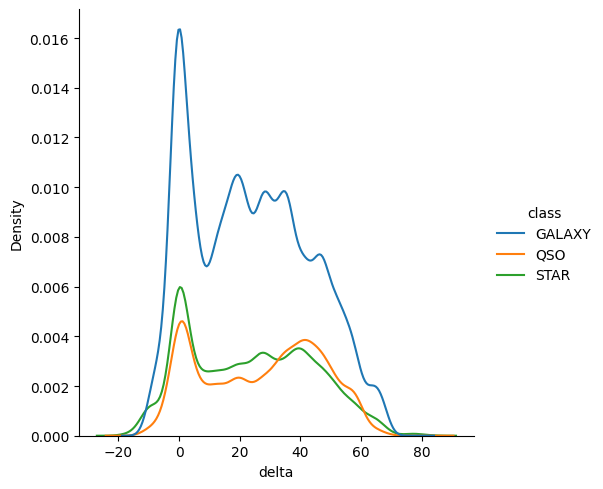

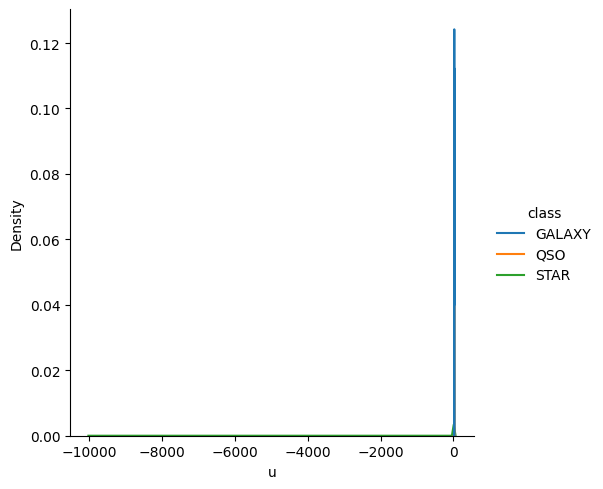

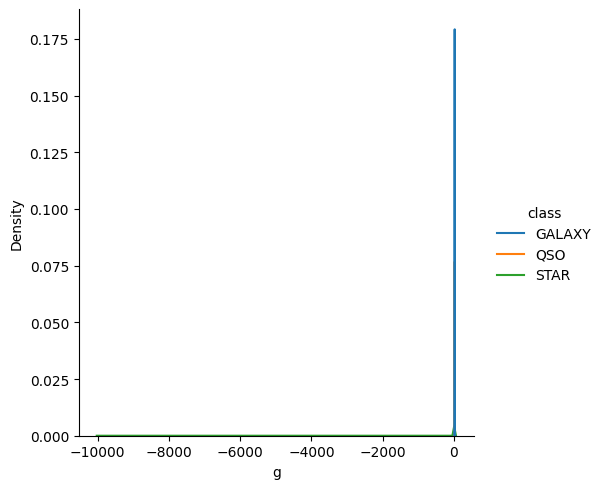

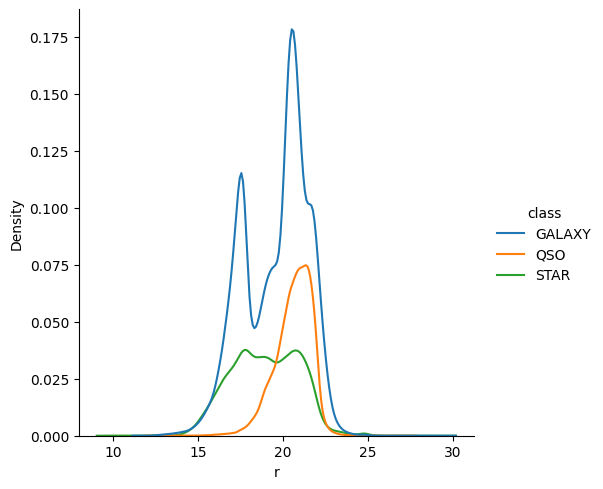

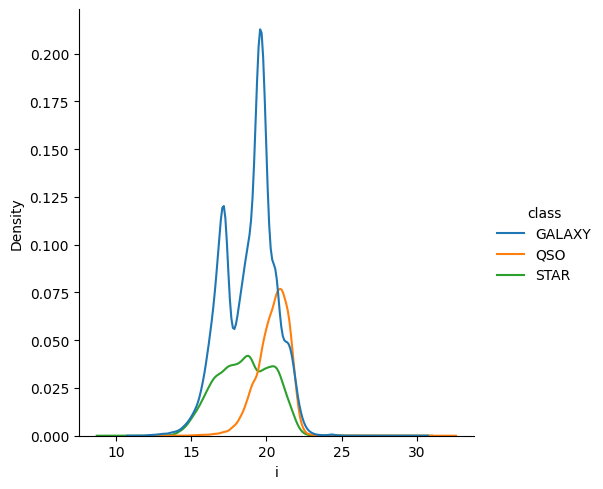

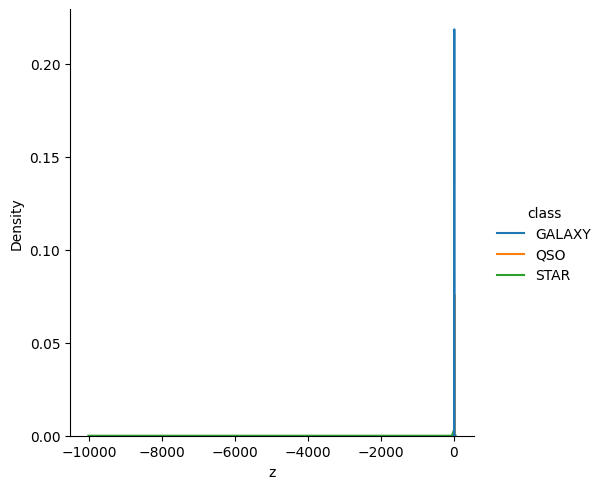

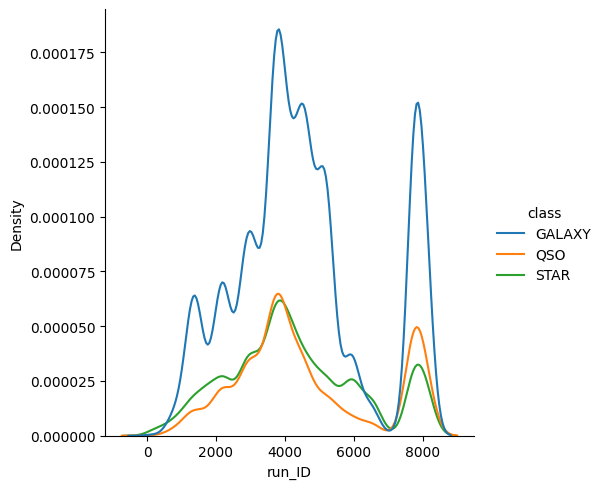

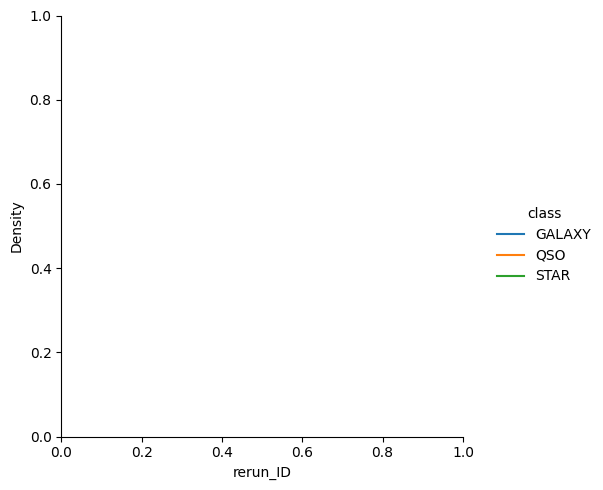

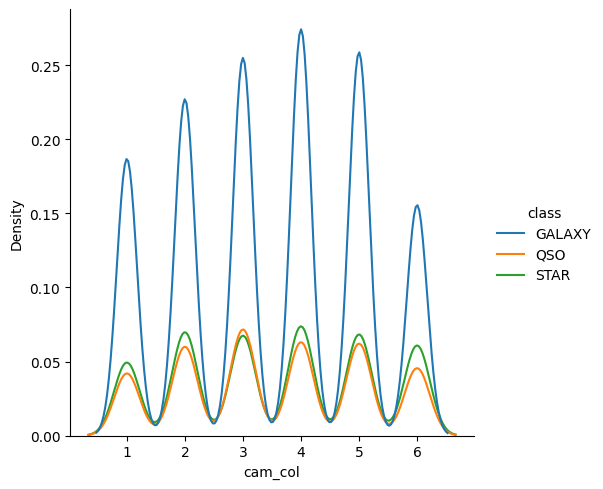

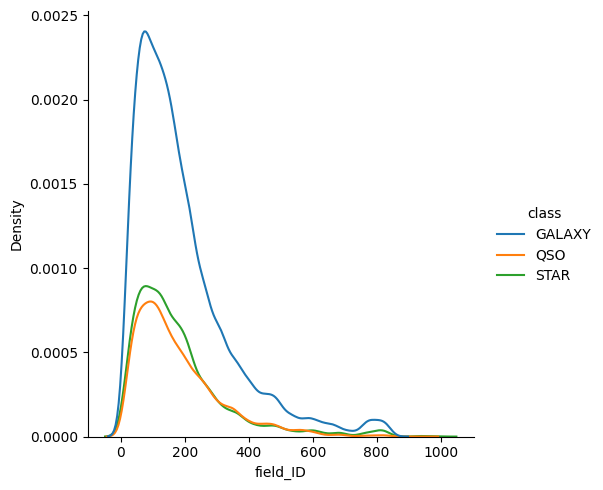

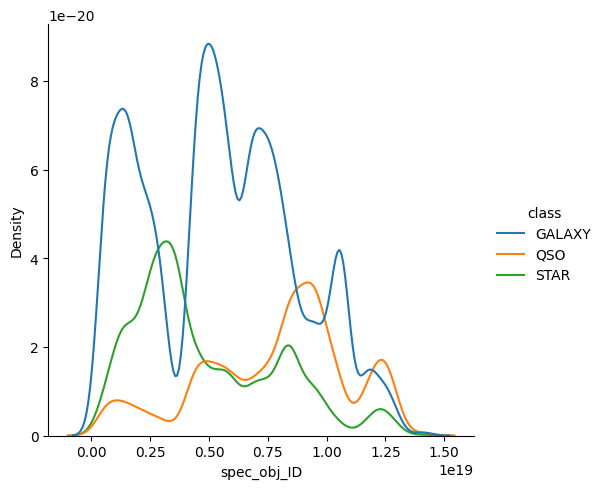

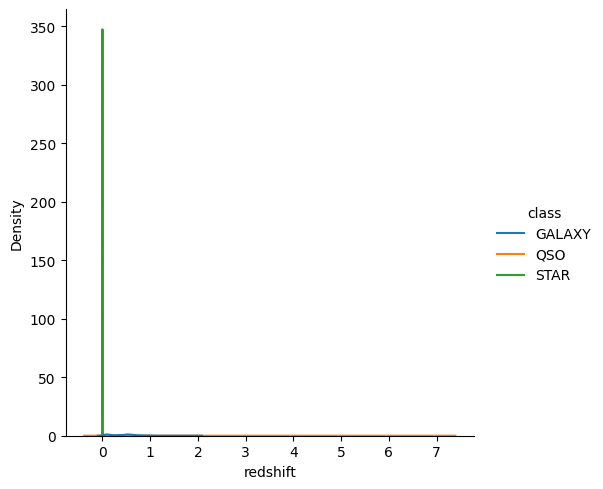

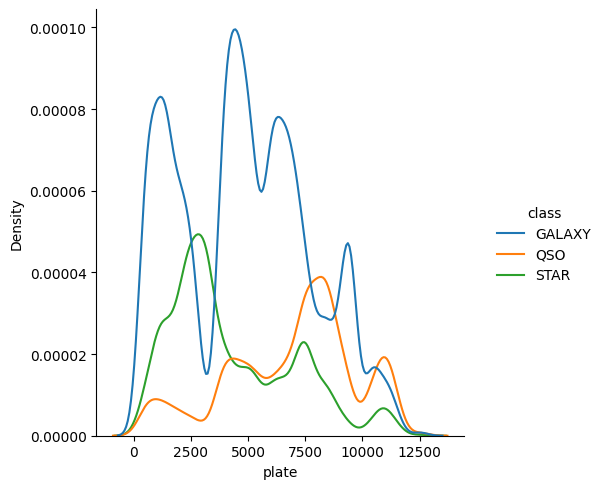

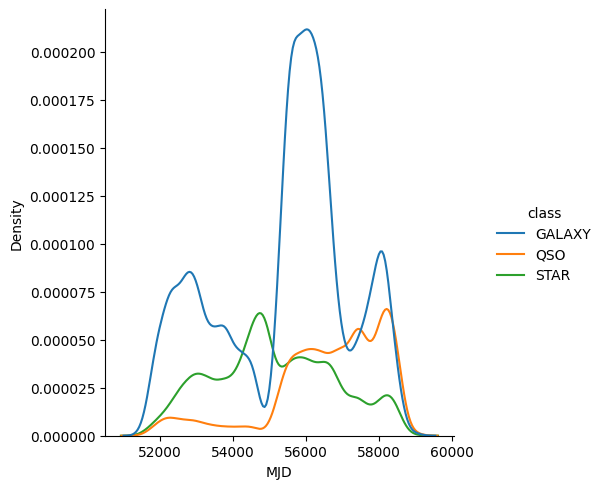

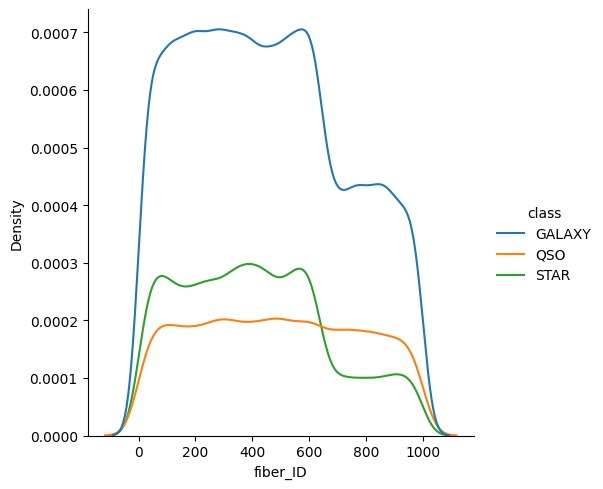

In [ ]:
#plot distribusi densitas pada setiap kolom terhadap class
featurecols = list(featuredf)
for i in range(len(featurecols)) :
  g = sns.displot(
      data=df, x=featurecols[i], hue="class",
      kind="kde")

Data redshift memiliki standar deviasi yang sangat kecil. Redshift pada bintang densitasnya sangat tinggi, namun rentang nilai redshiftnya sangat kecil mendekati nol. Sementara itu, redshift pada galaksi dan quasar densitasnya sangat kecil mendekati nol, namun rentang nilai redshiftnya lebih lebar.

## Filter band densities

<ipython-input-9-1bec0cfb733d>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['class']==astrObjs[i]][featurecols2[j]], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = featurecols2[j])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-9-1bec0cfb733d>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Pleas

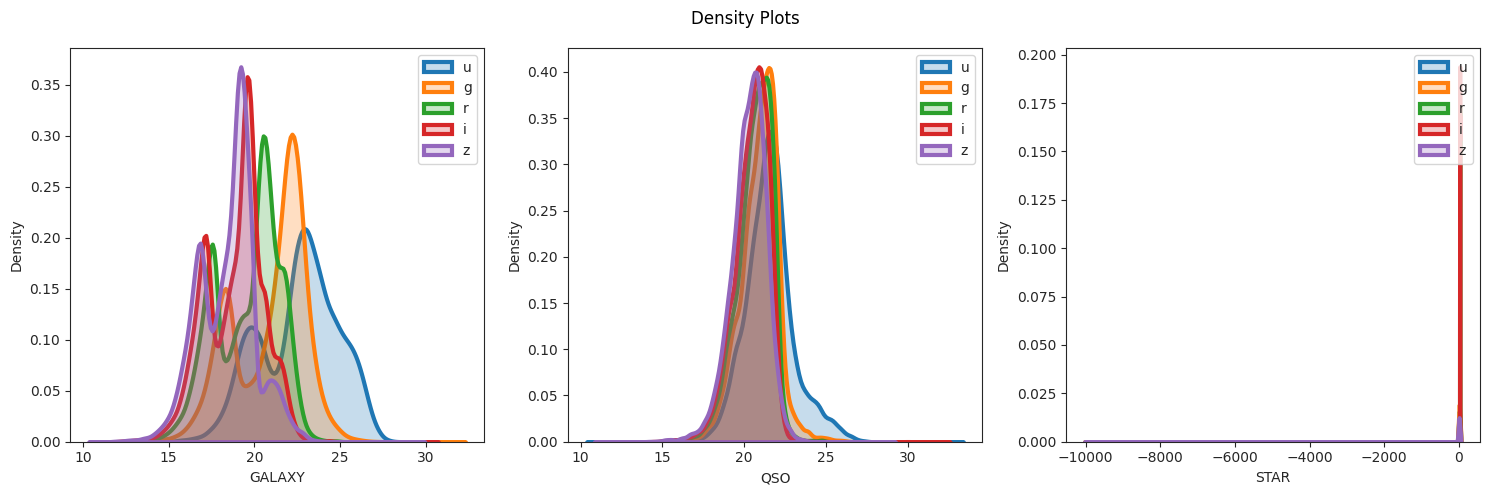

In [ ]:
featuredf2 = df.iloc[:,3:8] #data filter u, g, r, i, z
featurecols2 = list(featuredf2)
# plt.figure(figsize=(15,5))
# plt.suptitle('Density Plots')
# sns.set_style("ticks")
astrObjs = df['class'].unique()
# for i in range(len(astrObjs)):
#     plt.subplot(1, 3, i+1)
#     for j in range(len(featurecols2)):
#         sns.displot(df[df['class']==astrObjs[i]][featurecols2[j]], kde = True)

filterbands = pd.concat([df.iloc[:,3:8], df['class']],axis=1)
plt.figure(figsize=(15,5))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for i in range(len(astrObjs)):
    plt.subplot(1, 3, i+1)
    for j in range(len(featurecols2)):
        sns.distplot(df[df['class']==astrObjs[i]][featurecols2[j]], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = featurecols2[j])
    plt.legend()
    plt.xlabel(astrObjs[i])
    plt.ylabel('Density')
plt.tight_layout()

Outlier data filter paling banyak adalah pada data bintang

## Kesimpulan EDA
- Bintang memiliki nilai redshift paling kecil dibandingkan galaksi dan quasar.
- Banyak outlier di filter, terutama u, z dan g

# DATA PREPROCESSING

## Drop data yang tidak dibutuhkan


Klasifikasi didasarkan pada fotometri, yakni pengamatan pada panjang gelombang yang bervariasi. Pada data pengamatan digunakan filter u, g, r, i, dan z. Jadi, kolom 'obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID' akan di-*drop*.

In [ ]:
df = df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis=1)
df.head()

,u,g,r,i,z,spec_obj_ID,class,redshift,plate,MJD
0,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,GALAXY,0.634794,5812,56354
1,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,GALAXY,0.779136,10445,58158
2,25.26307,22.66389,20.60976,19.34857,18.94827,5.152200e+18,GALAXY,0.644195,4576,55592
3,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,GALAXY,0.932346,9149,58039
4,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,GALAXY,0.116123,6121,56187


## Memisahkan data target, numerik, dan non numerik

In [ ]:
'''
Mengubah type variabel class ke numerik agar bisa diliat korelasinya dalam
heatmap

'''

df['class'].replace(['GALAXY', 'STAR', 'QSO'],
                        [0, 1, 2], inplace=True)
df

,u,g,r,i,z,spec_obj_ID,class,redshift,plate,MJD
0,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,0,0.634794,5812,56354
1,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,0,0.779136,10445,58158
2,25.26307,22.66389,20.60976,19.34857,18.94827,5.152200e+18,0,0.644195,4576,55592
3,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,0,0.932346,9149,58039
4,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,0,0.116123,6121,56187
...,...,...,...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,1.055431e+19,0,0.000000,9374,57749
99996,22.69118,22.38628,20.45003,19.75759,19.41526,8.586351e+18,0,0.404895,7626,56934
99997,21.16916,19.26997,18.20428,17.69034,17.35221,3.112008e+18,0,0.143366,2764,54535
99998,25.35039,21.63757,19.91386,19.07254,18.62482,7.601080e+18,0,0.455040,6751,56368


In [ ]:
df['class'] = pd.to_numeric(df['class'])

In [ ]:
dict(df.dtypes)

{'u': dtype('float64'),
 'g': dtype('float64'),
 'r': dtype('float64'),
 'i': dtype('float64'),
 'z': dtype('float64'),
 'spec_obj_ID': dtype('float64'),
 'class': dtype('int64'),
 'redshift': dtype('float64'),
 'plate': dtype('int64'),
 'MJD': dtype('int64')}

## Visualisasi distribusi data pada data numerik

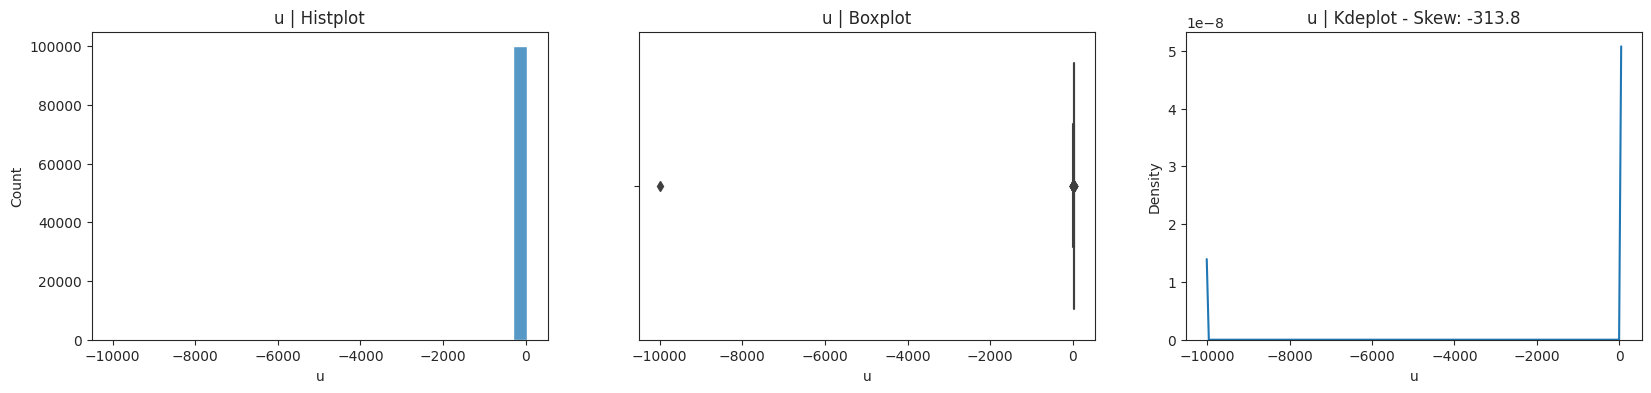

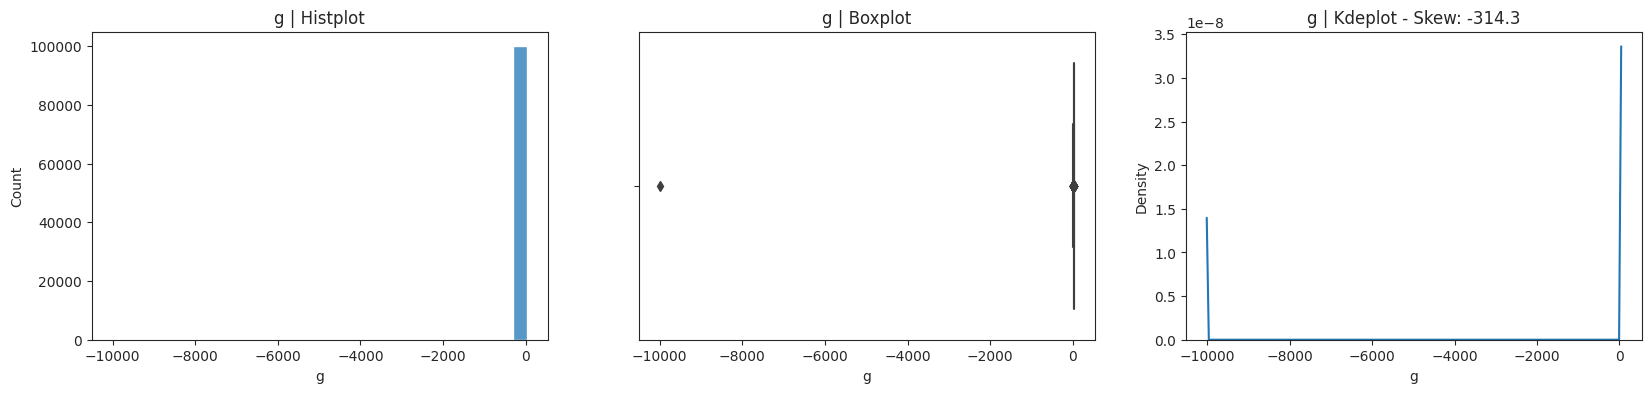

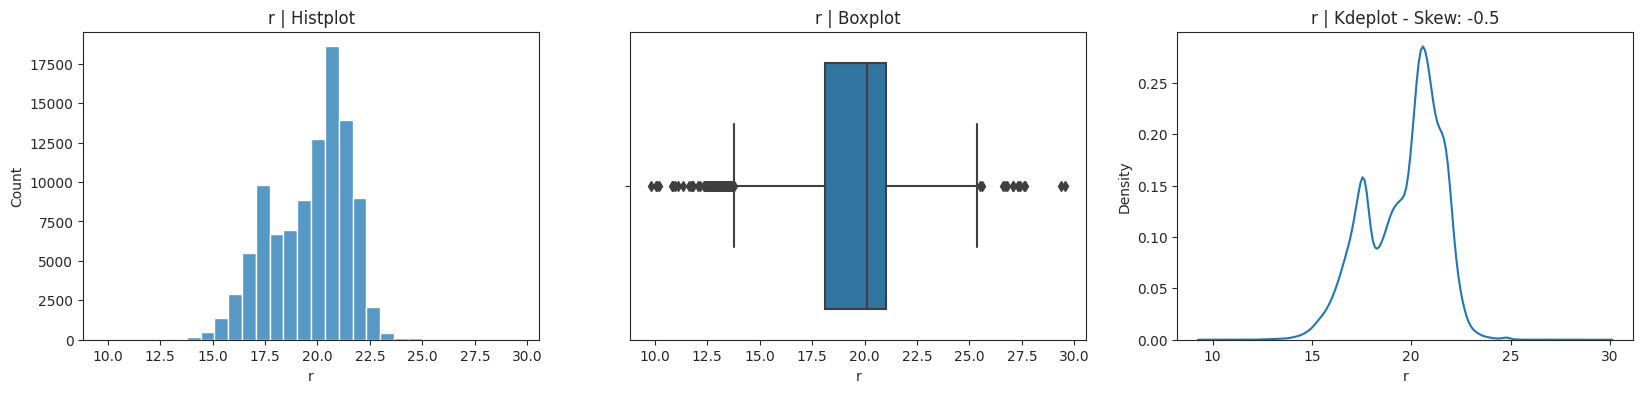

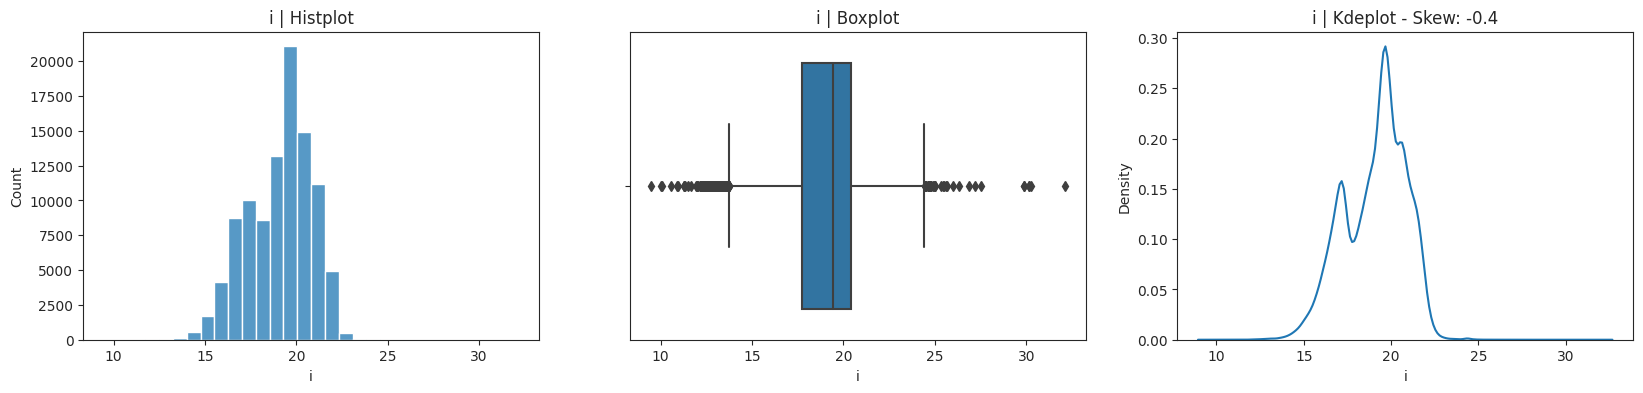

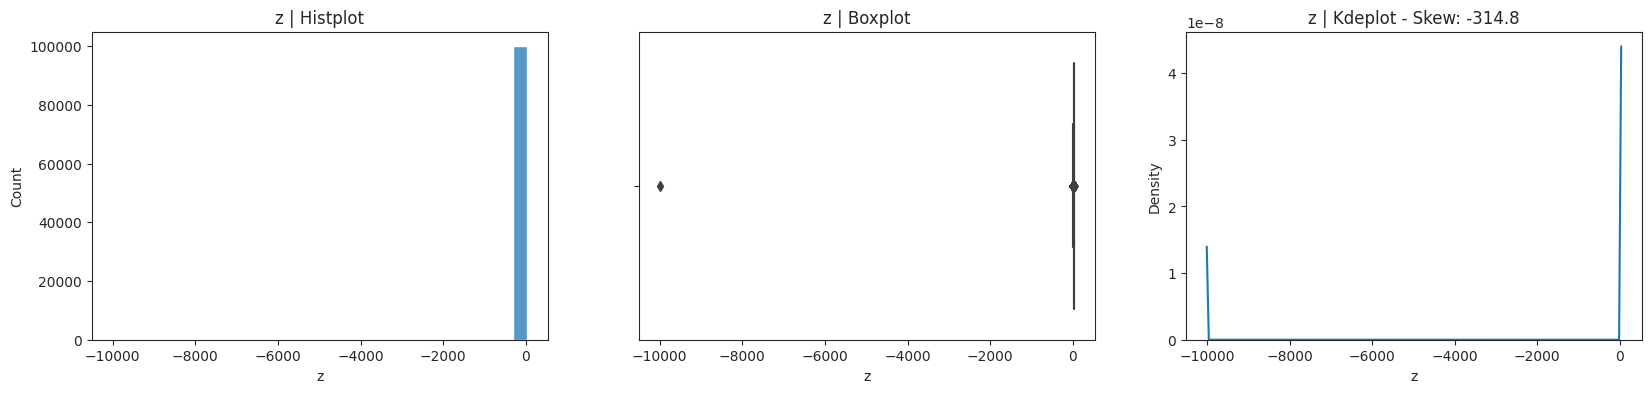

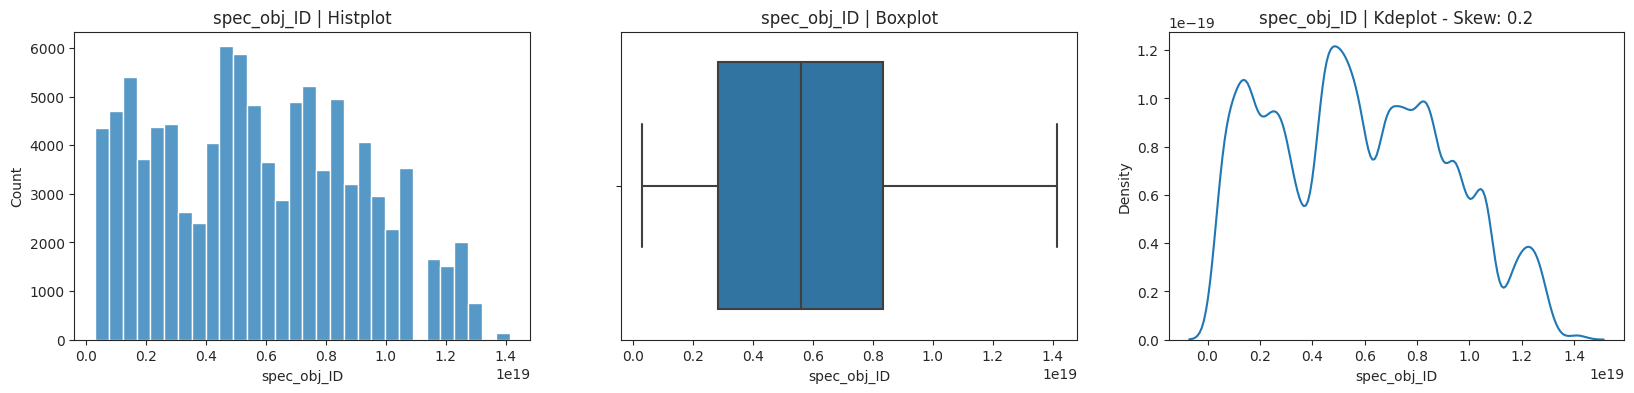

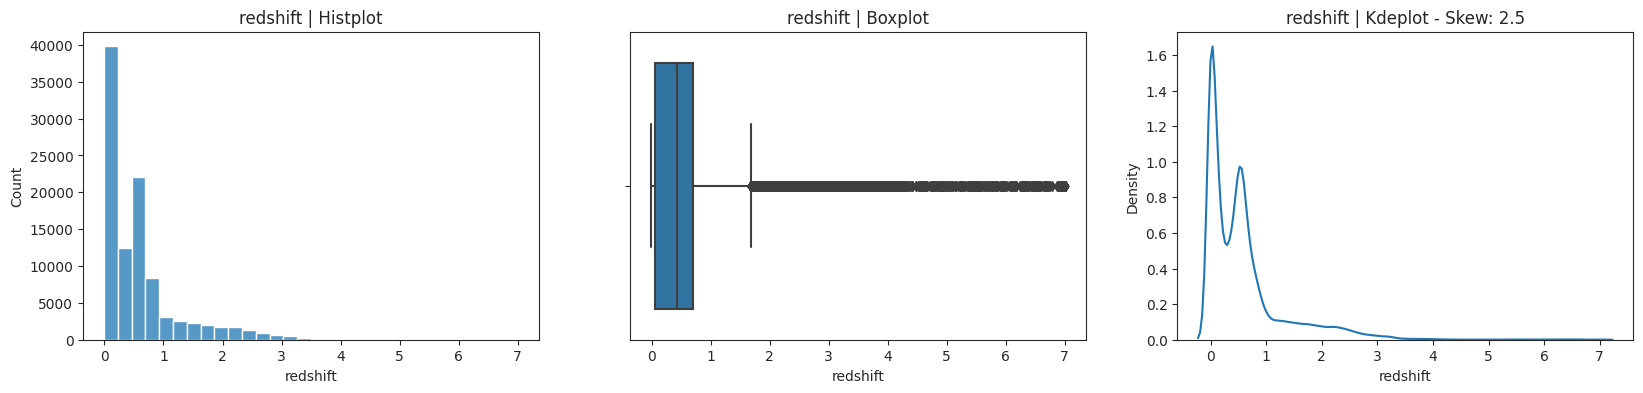

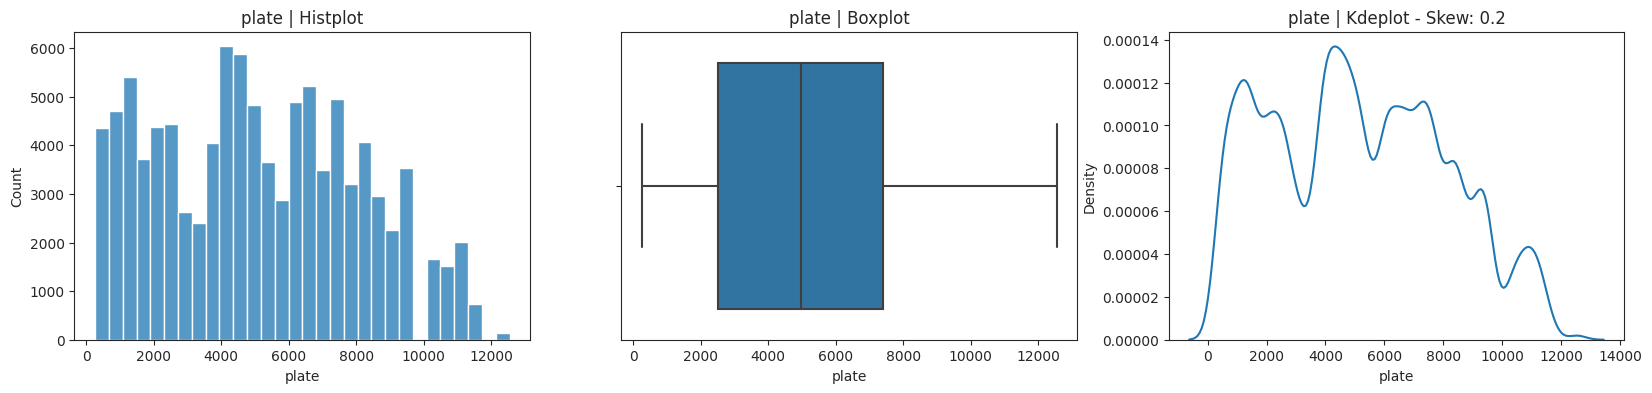

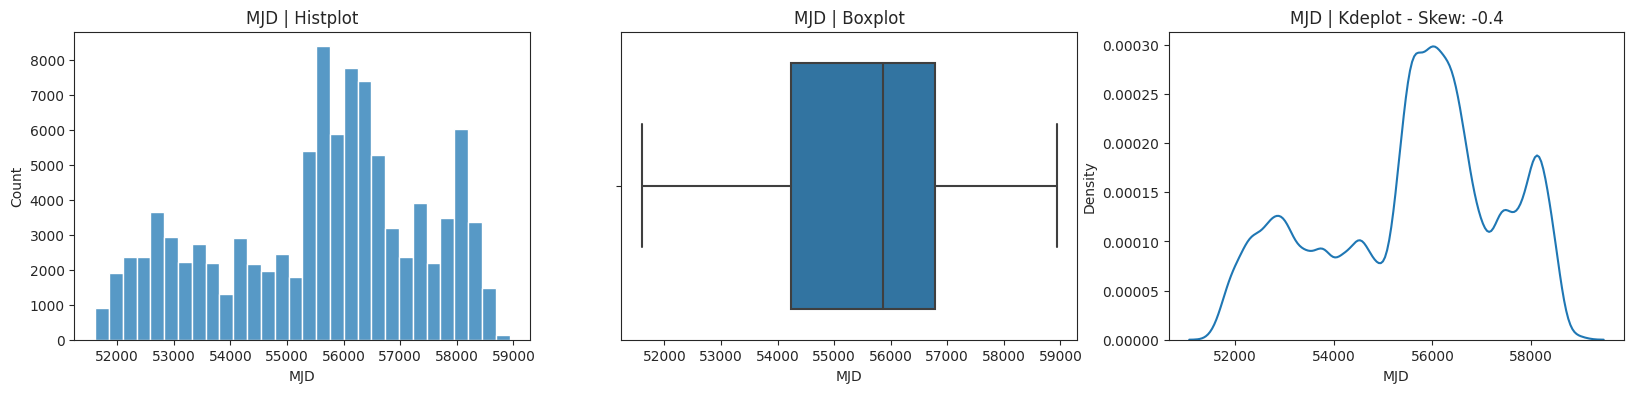

In [ ]:
df_without_class = df.drop(columns='class')
for i in df_without_class.columns:
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    sns.histplot(x=featuredf[i],ax=ax[0], bins=30)
    sns.boxplot(x=featuredf[i], ax=ax[1])
    sns.kdeplot(featuredf[i], ax=ax[2])
    skew_val=round(featuredf[i].skew(), 1)
    ax[0].set_title(i + " | Histplot")
    ax[1].set_title(i + " | Boxplot")
    ax[2].set_title(i + " | Kdeplot - Skew: "+str(skew_val))
    plt.show()

- Terlihat bahwa terdapat nilai ekstrim pada u, g, dan z
- Pada data r, dan i distribusi datanya cenderung normal dengan outlier di atas dan bawah
- Pada data redshift, distribusi datanya condong ke kiri dengan outlier di atas nilai maksimal.

## Heatmap correlation

<Axes: >

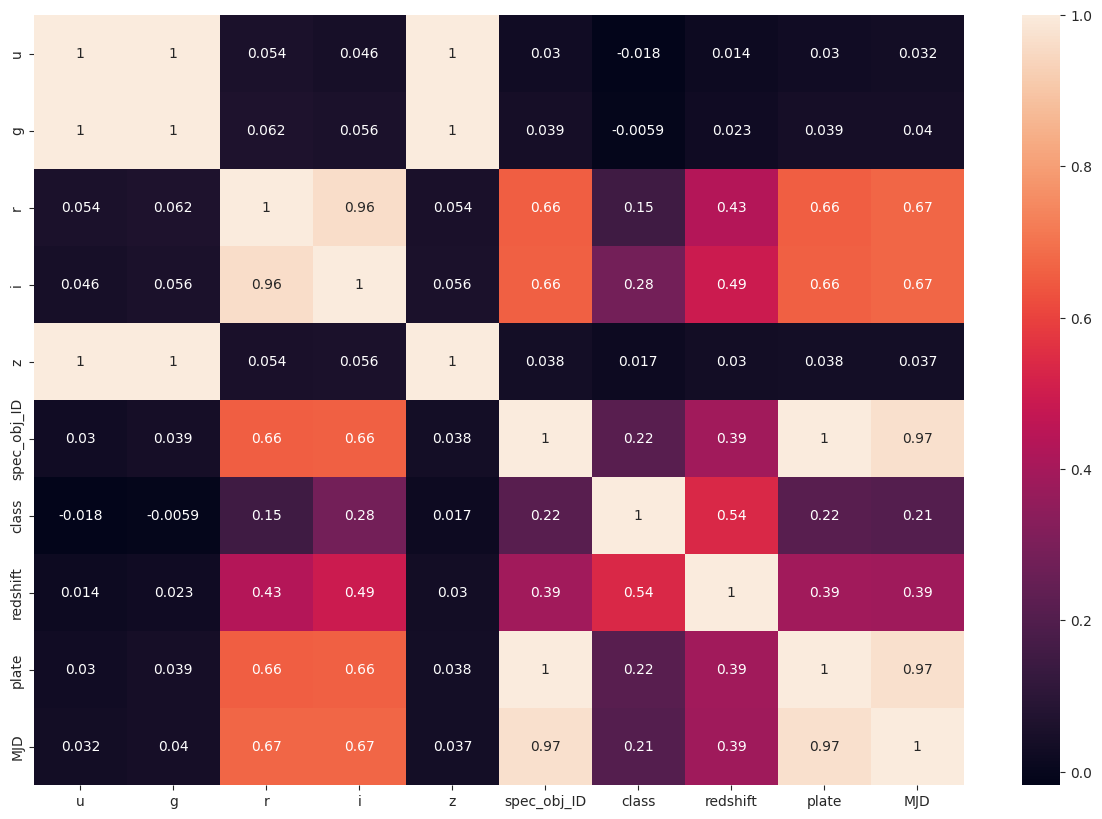

In [ ]:
plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr,annot=True)

- filter r dan i berkorelasi positif
- redshift paling berkorelasi dengan target class

## Split dataset

## Encoding fitur kategorik

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['class'] = LE.fit_transform(df['class'])
df['class'].value_counts()

0    59445
1    21594
2    18961
Name: class, dtype: int64

## Data Cleaning

In [ ]:
#remove outlier data
def rem_outliers():
    s1 = df.shape

    for i in df.select_dtypes(include = 'number').columns:
        qt1 = df[i].quantile(0.25)
        qt3 = df[i].quantile(0.75)
        iqr =  qt3 - qt1
        lower = qt1-(1.5*iqr)
        upper = qt3+(1.5*iqr)
        min_in = df[df[i]<lower].index
        max_in = df[df[i]>upper].index
        df.drop(min_in, inplace = True)
        df.drop(max_in, inplace = True)

    s2 = df.shape
    outliers = s1[0] - s2[0]
    return outliers


In [ ]:
print("Number of outliers deleted are : ", rem_outliers())

Number of outliers deleted are :  9400


In [ ]:
df.shape

(90600, 10)

# DATA MODELING

## Training and test splits

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#split the data
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, shuffle=True, random_state=43)
#Making a standardize dataset
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
oversampler = SMOTE(random_state=1)

sc = StandardScaler()
sc.fit(X_train)

X_train = pd.DataFrame(sc.transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns, index = X_test.index)

#Training the dataset
X_train_smote, y_train_smote = oversampler.fit_resample(X_train, y_train)

## RANDOM FOREST

In [ ]:
model1 = RandomForestClassifier()
model1 = model1.fit(X_train_smote, y_train_smote)
print('Random FOrest Classifier Trained')

Random FOrest Classifier Trained


### Accuracy score

In [ ]:
y_pred1 = model1.predict(X_test)

from sklearn.metrics import accuracy_score
acc1 = model1.score(X_test, y_test)

print('Accuracy : %.5f' % acc1)

Accuracy : 0.97520


### Confusion Matrix

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


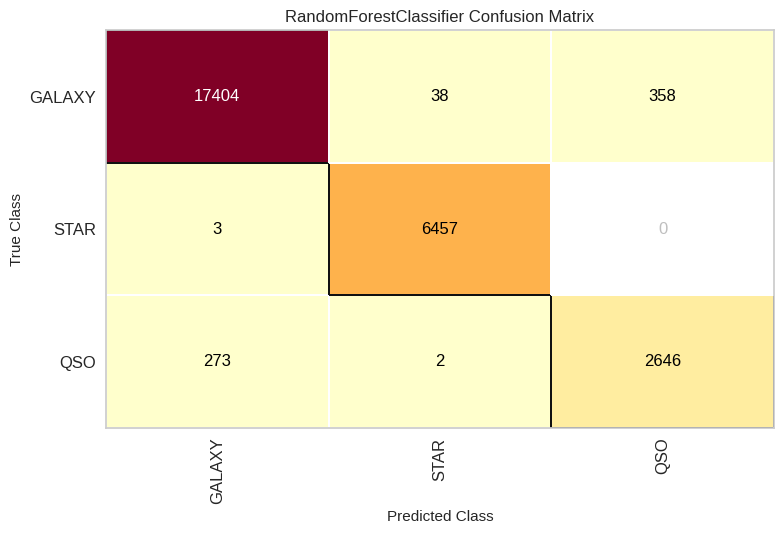

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model1, classes=['GALAXY','STAR','QSO'])

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17800
           1       0.99      1.00      1.00      6460
           2       0.88      0.90      0.89      2921

    accuracy                           0.98     27181
   macro avg       0.95      0.96      0.96     27181
weighted avg       0.98      0.98      0.98     27181



## DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state = 30)
model2 = model2.fit(X_train_smote, y_train_smote)
print('Decision Tree Trained')

Decision Tree Trained


### Accuracy Score

In [ ]:
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score
acc2 = model2.score(X_test, y_test)

print('Accuracy : %.5f' % acc2)

Accuracy : 0.95269


### Confusion Matrix

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


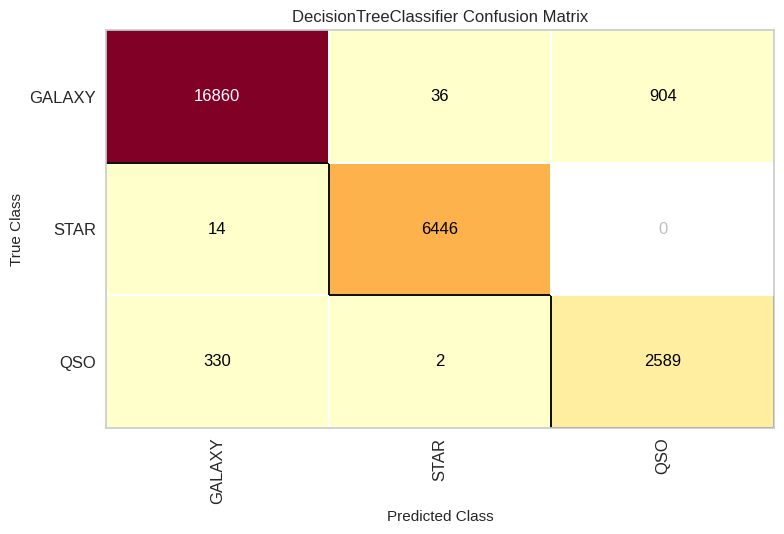

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
cm = ConfusionMatrix(model2, classes=['GALAXY','STAR','QSO'])

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     17800
           1       0.99      1.00      1.00      6460
           2       0.74      0.89      0.81      2921

    accuracy                           0.95     27181
   macro avg       0.91      0.94      0.92     27181
weighted avg       0.96      0.95      0.95     27181



## GAUSSIAN NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train_smote, y_train_smote)
print('Gaussian Naive Bayes Trained')

Gaussian Naive Bayes Trained


### Accuracy score

In [ ]:
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score
acc3 = model3.score(X_test, y_test)

print('Accuracy : %.5f' % acc3)

Accuracy : 0.84651


### Confusion Matrix

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


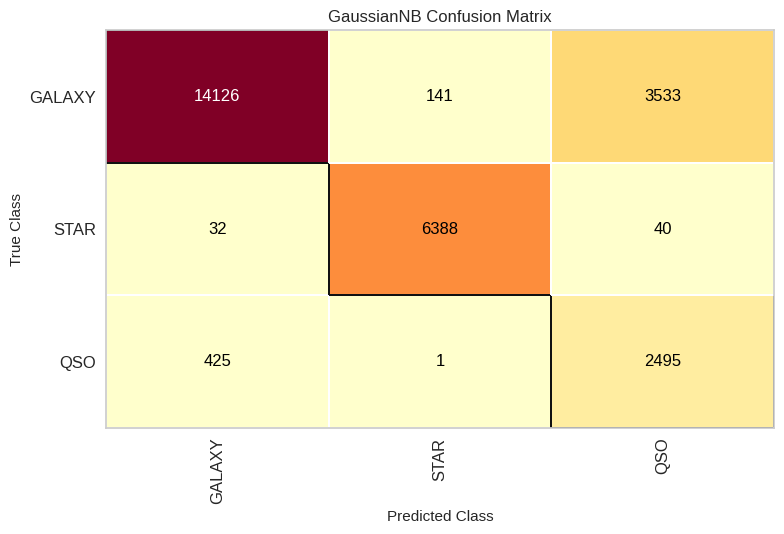

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
cm = ConfusionMatrix(model3, classes=['GALAXY','STAR','QSO'])

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

### Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87     17800
           1       0.98      0.99      0.98      6460
           2       0.41      0.85      0.56      2921

    accuracy                           0.85     27181
   macro avg       0.79      0.88      0.80     27181
weighted avg       0.91      0.85      0.86     27181



## Perbandingan Akurasi Random Forest, Decision Tree, dan Gaussian Naive Bayes

In [ ]:
acc_score_df = pd.DataFrame(columns=['Algorithm', 'Accuration score'])
acc_score_df = acc_score_df.append({'Algorithm' : ['Random Forest', 'Decision Tree', 'Gaussian Naive Bayes'],
                                    'Accuration Score' : [acc1, acc2, acc3]},
                                    ignore_index = True)
acc_score_df

<ipython-input-102-929b17bc7a5a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  acc_score_df = acc_score_df.append({'Algorithm' : ['Random Forest', 'Decision Tree', 'Gaussian Naive Bayes'],


,Algorithm,Accuration score,Accuration Score
0,"[Random Forest, Decision Tree, Gaussian Naive ...",NaN,"[0.9752032669879696, 0.9526875390898054, 0.846..."


In [ ]:
from sklearn.metrics import recall_score
rf_df = pd.DataFrame(columns=['Estimators','Recall score'])
#mencari n_estimator terbaik
for i in range(1,21):#ambil inisial = 20
    model1 = RandomForestClassifier(n_estimators = i, random_state = 30)
    model1.fit(X_train, y_train)
    y_pred1 = model1.predict(X_test)
    rf_df = rf_df.append({'Estimators':i, 'Recall score':recall_score(y_test, y_pred1, average = 'weighted')}, ignore_index = True)

rf_df